# 1 - Introdução

## 1.1 - Algoritmo de Classificação
Um algoritmo de classificação tem como objetivo organizar dados de maneira eficaz, categorizando instâncias ou registros em grupos distintos. Existem diferentes tipos de classificação, como a <font color=pink>binária,</font> que divide os dados em duas categorias, e a <font color=pink>multiclasse,</font> que envolve mais de duas classes. Além disso, há também a classificação <font color=yellow>multirrótulo,</font> onde uma instância pode ser rotulada com mais de uma classe. A escolha do método de classificação depende do tipo de problema e da estrutura dos dados. Algoritmos de classificação são ferramentas poderosas para análise de dados e tomada de decisões fundamentadas.

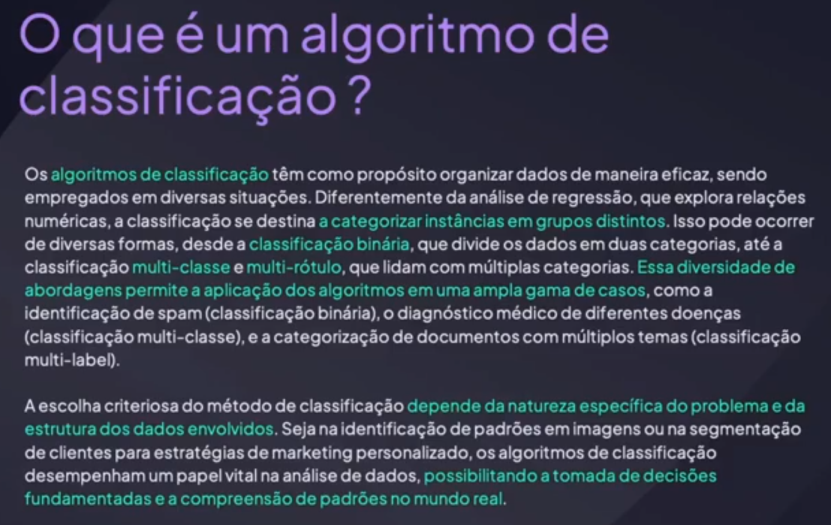

# 1.2 - Um Passeio Pelos Algoritmos de Classificação
- Vamos explorar os principais algoritmos de classificação. 
- Um deles é a <u>regressão logística</u>, que é usada para problemas de classificação binária, como identificar se um e-mail é spam ou não. 
- Outro algoritmo é o <u>Naive Bayes</u>, que assume independência condicional entre as características e é útil quando se tem conjuntos de dados com muitas características. 
- O <u>K-Nearest Neighbors</u> classifica uma instância com base nos vizinhos mais próximos, usando uma medida de distância. 
- Já o <u>Support Vector Machines</u> busca encontrar um hiperplano que melhor separa as instâncias de diferentes classes.

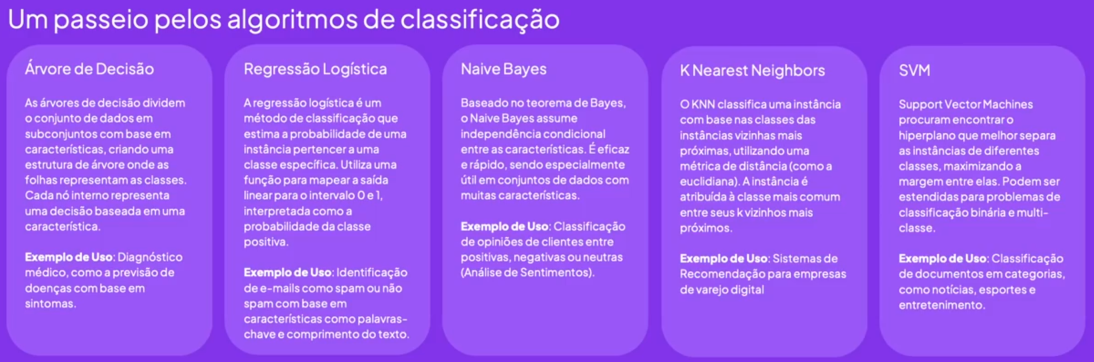

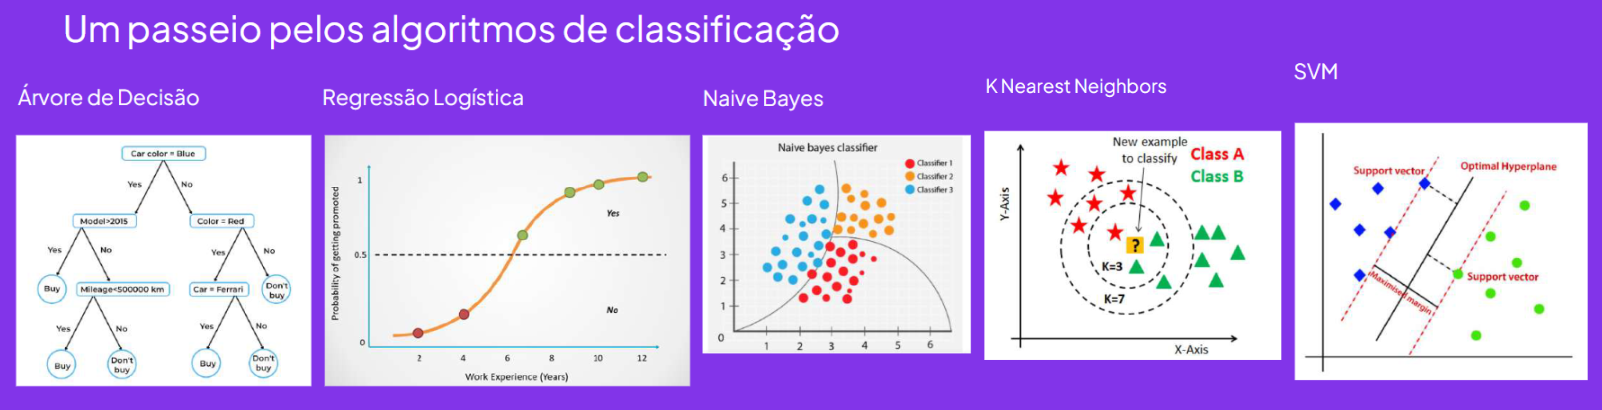

# 2 - Árvore de Decisão

## 2.1 - O que é Árvore de Decisão
- A árvore de decisão é um modelo de aprendizado que representa uma estrutura hierárquica de decisões baseadas nas características dos dados. 
- Começamos escolhendo uma variável que melhor separa os dados e utilizamos métricas como ganho de informação ou índice de pureza para avaliar as divisões. 
- Cada nó da árvore gera ramos que continuam o processo de subdivisão até chegarmos às folhas, que representam as decisões finais ou classes que queremos prever. 
- O objetivo é minimizar a entropia ou impureza nos dados, capturando padrões complexos. 
- Também discutimos conceitos como entropia, ganho de informação, corte ou pruning da árvore e a importância de ajustar a profundidade da árvore para evitar overfitting. 
- Além disso, abordamos como lidar com variáveis categóricas e numéricas e a técnica de tunar o algoritmo usando grid search e random search.

## 2.2 - Exemplo de Árvore de Decisão
- Discutiremos a importância da homogeneidade ao construir uma árvore de decisão. 
- Utilizamos um exemplo com duas variáveis: saldo e tipo de residência. 
- Ao analisar a proporção das instâncias em cada grupo, vimos que a diferença proporcional é maior quando consideramos o saldo. 
- Isso resulta em uma entropia mais baixa e um ganho de informação maior. 
- Por outro lado, ao considerar o tipo de residência, a diferença proporcional é menor, resultando em uma entropia mais alta e um ganho de informação menor. 
- Portanto, é importante escolher as variáveis corretas para obter uma árvore de decisão mais precisa.

# 3 - Apresentação do Projeto Prático
- O objetivo é ajudar uma empresa fictícia de concessão de crédito para pequenas empresas. 
- A empresa possui um catálogo de clientes PJ (pessoas jurídicas) e queremos criar um classificador que determine o segmento de cada cliente com base em informações como idade da empresa, faturamento mensal e nível de inovação. 
- Vamos carregar os dados, realizar uma análise exploratória, preparar o conjunto de treinamento e teste usando validação cruzada. 
- Em seguida, treinaremos o modelo, validaremos e ajustaremos os hiperparâmetros. 
- Analisaremos as métricas do modelo, salvaremos e entregaremos o modelo em uma aplicação batch. 
- Vamos aprender sobre EDA, gráficos, hiperparâmetros e validação cruzada. 
- Este projeto prático trará muitas novidades em relação ao que já fizemos antes.

# 4 - Análise Exploratória de Dados

## 4.1 - Importação das Bibliotecas

In [1]:
#pip install

In [2]:
#EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimização de Hiperparâmetro
import optuna

# Salvar modelo
import joblib

#Front-End
import gradio as gr

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 4.2 - Setup, Carga dos Dados e EDA Inicial
- Começaremos a parte prática do projeto de classificação de empresas por segmento. 
- Configuramos o ambiente virtual e importamos as bibliotecas necessárias, como pandas, plotly, matplotlib e scikit-learn. 
- Em seguida, carregamos o dataset e realizamos a análise exploratória dos dados (EDA). 
- Verificamos os valores únicos das variáveis categóricas, como atividade econômica, localização e segmento de clientes. 
- Também observamos os valores possíveis da variável de inovação, que é uma variável ordinal. 
- Não encontramos valores nulos no dataset. No próximo vídeo, continuaremos com o EDA.

In [3]:
df_segmento = pd.read_csv('./dataset_segmento_clientes.csv')

In [4]:
df_segmento.head()

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver


In [5]:
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [6]:
# Valores possíveis - Atividades Categórica
df_segmento.atividade_economica.unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [7]:
# Valores possíveis - Localização
df_segmento.localizacao.unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [8]:
# Valores possíveis - Segmento do Cliente
df_segmento.segmento_de_cliente.unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [9]:
# Valores possíveis - Inovação (Rating)
df_segmento.inovacao.unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2], dtype=int64)

## 4.3 - Análise Variáveis Qualitativas
- Continuando nossa análise exploratória de dados (EDA) e focamos na distribuição das variáveis do nosso dataset. 
- Começamos analisando a distribuição da variável target, que é o segmento de cliente que queremos prever. 
- Observamos que a base está desbalanceada, com a maioria dos registros nos segmentos bronze e silver. 
- Em seguida, utilizamos a biblioteca Plotly para criar gráficos de barras que mostram a distribuição do target de forma visual. 
- Também analisamos a distribuição percentual do target e das variáveis localização, atividade econômica e inovação. 
- Concluímos que há desbalanceamento na base em relação ao target, mas não nas outras variáveis categóricas.

In [10]:
# Distribuição da Variável Segmento de Cliente (Target)
contagem_target = df_segmento.segmento_de_cliente.value_counts()
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [11]:
# Criar uma lista ordenada do Target
lista_segmentos = ['Starter', 'Bronze', 'Silver', 'Gold']

In [12]:
# Distribuição da Variável Target - Quantidade
px.bar(contagem_target, color=contagem_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [13]:
# Distribuição da Variável Target - Percentual
percentual_target = contagem_target/len(df_segmento)*100
px.bar(percentual_target, color=percentual_target.index, category_orders={'segmento_de_cliente': lista_segmentos})

In [14]:
# Distribuição da Variável Localização - Percentual
percentual_localizacao = df_segmento.value_counts('localizacao')/len(df_segmento)*100
px.bar(percentual_localizacao, color=percentual_localizacao.index)

In [15]:
# Distribuição da Variável Atividade Economica - Percentual
atividade_economica = df_segmento.value_counts('atividade_economica')/len(df_segmento)*100
px.bar(atividade_economica, color=atividade_economica.index)

In [16]:
# Distribuição da Variável Inovação - Percentual
inovacao = df_segmento.value_counts('inovacao')/len(df_segmento)*100
px.bar(inovacao, color=inovacao.index)

## 4.4 - Crosstab Variáveis Qualitativas
- Exploraremos a tabela de contingência entre as variáveis categóricas do nosso dataset. 
- Utilizamos a função crosstab do Pandas para cruzar a quantidade de registros de uma variável categórica com a quantidade de registros do target. 
- Observamos que há um padrão interessante entre a variável Inovação e o segmento das empresas. 
- Nas empresas Gold, por exemplo, não encontramos nenhuma empresa com nível de Inovação menor do que 5, o que indica que para ser considerada Gold, a empresa precisa ter um nível de Inovação mais alto. 
- Já nas empresas Starter, há uma concentração maior nos níveis iniciais de Inovação. 
- Além disso, também analisamos a tabela de contingência entre a localização e o target, e a tabela de contingência entre a atividade econômica e o target. 
- Essas análises nos ajudam a compreender melhor as relações entre as variáveis categóricas e o target. 
- No próximo vídeo, continuaremos nossa análise exploratória de dados.

In [17]:
# Tabela de Contingência entre Localização e Target
crosstab_localizacao = pd.crosstab(df_segmento.localizacao, df_segmento.segmento_de_cliente, margins=True)[lista_segmentos].reset_index()
tabela_localizacao = ff.create_table(crosstab_localizacao)
# Mostrar Crosstab
tabela_localizacao.show()

In [18]:
# Tabela de Contingência entre Atividade Economica e Target


In [19]:
# Tabela de Contingência entre Inovação e Target

## 4.5 - Análise Variáveis Quantitativas
 Exploraremos a relação entre variáveis categóricas e numéricas usando gráficos de boxplot. Primeiro, analisamos a relação entre o segmento de cliente e a idade da empresa. Observamos que, visualmente, não parece haver uma associação forte entre essas duas variáveis. Em seguida, analisamos a relação entre o segmento de cliente e o faturamento mensal. Novamente, não encontramos uma associação direta entre essas variáveis. Concluímos que, graficamente falando, não parece haver uma correlação forte entre as variáveis categóricas e numéricas estudadas. No próximo vídeo, faremos um teste estatístico entre variáveis qualitativas.

In [20]:
# Distribuição Idade
px.histogram(df_segmento, x='idade')

In [21]:
# Distribuição Faturamento Mensal

In [22]:
# Distribuição Faturamento Mensal

In [23]:
# Box Plot entre Idade e Segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmentos})

In [24]:
# Box Plot entre Faturamento Mensal e Segmento

## 4.6 - Correlação Variáveis Qualitativas
Concluíremos a análise exploratória de dados com um teste estatístico para correlacionar variáveis categóricas com a variável target. Usamos o teste de Qui-Quadrado de Pearson com uma biblioteca diferente para mostrar outras formas de executar o teste. Analisamos a variável "localização" em relação ao "segmento de cliente" e concluímos que as variáveis são independentes. Em seguida, realizamos o mesmo teste para as variáveis "atividade econômica" e "inovação", e também concluímos que são independentes. No entanto, no caso da variável "inovação", encontramos uma correlação significativa, rejeitando a hipótese nula. Com isso, finalizamos a análise exploratória de dados e estamos prontos para treinar nosso modelo.

In [25]:
# Teste de Qui-Quadrado de Pearson
# H0 - as variáveis são independentes
# H1´- as variáveis não são independentes
# Se p-value > 0.05, aceita a hipótese nula, caso contrário, rejeita

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.



In [26]:
# valor esperado
# É A frequência que seria esperada se não houvesse nenhuma associação entre as variáveis
# É calculado utilizando a distribuição assumida no teste qui-quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [27]:
# Valor observado
# É a frequencia real dos dados coletados
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [28]:
# Estatísticas
estatisticas.round(5)

# As variáveis localização e segmento de cliente são independentes. Qui-quadrado (p-value=0.81)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


In [29]:
# Teste de Qui-Quadrado de Pearson
# H0 - as variáveis são independentes
# H1´- as variáveis não são independentes
# Se p-value > 0.05, aceita a hipótese nula, caso contrário, rejeita

valor_esperado, valor_observado, estatisticas = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

divide by zero encountered in power

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

invalid value encountered in multiply

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning:

divide by zero encountered in divide



In [30]:
# valor esperado
# É A frequência que seria esperada se não houvesse nenhuma associação entre as variáveis
# É calculado utilizando a distribuição assumida no teste qui-quadrado
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [31]:
# Valor observado
# É a frequencia real dos dados coletados
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [32]:
# Estatísticas
estatisticas.round(5)

# As variáveis atividade_economica e segmento de cliente são independentes. Qui-quadrado (p-value=0.35292)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,9.96998,9.0,0.35292,0.08153,0.18948
1,cressie-read,0.66667,10.60995,9.0,0.30339,0.08410,0.20060
2,log-likelihood,0.00000,13.54637,9.0,0.13940,0.09503,0.25375
3,freeman-tukey,-0.50000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,9.0,0.00000,inf,NaN
5,neyman,-2.00000,NaN,9.0,NaN,NaN,NaN


In [33]:
# Fazer o mesmo com a variável de inovação

# 5 - Treinamento do Modelo

## 5.1 - Fazendo o Treinamento do Modelo
Demos início ao treinamento do nosso modelo de árvore de decisão após a análise exploratória de dados. Primeiro, separamos as variáveis independentes (X) e a variável dependente (Y). Como nosso algoritmo não lida com variáveis categóricas, criamos um pipeline para converter essas variáveis em numéricas usando o OneHotEncoder. Em seguida, criamos um pré-processador com o ColumnTransformer e um pipeline final com o pré-processador e o modelo de árvore de decisão. Utilizamos a validação cruzada estratificada para lidar com o desbalanceamento do dataset. Ao executar o modelo, obtivemos as métricas de acurácia para cada split e calculamos a média. Na próxima aula, exploraremos outras métricas e abordagens para treinar o modelo.

In [34]:
df_segmento.head()

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver


In [35]:
# Separar X e y
X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento.segmento_de_cliente

In [36]:
# Pipeline]
# OneHotEncoder nas variáveis categóricas
# Treinamento do Modelo

# Lista de variáveis categóricas
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variáveis categóricas usando o OneHotEncoder
# Transformer para Colunas Numéricas igual feito no EDA, mas usando o Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

# Preprocessador, que encapsula o transformer anterior, onde fará parte do pipeline geral que treinará o modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline com Pre-processor e o modelo de arvore de decisao
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier()),
])

In [37]:
# Treinar o modelo com Validação Cruzada, usando StratifiedKFold, dado que as classes estão desbalanceadas
cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)

In [38]:
# Mostrar o Retorno do Cross Validation das 3 splits
metrics_result

{'fit_time': array([0.00603342, 0.00302005, 0.00302029]),
 'score_time': array([0.00301123, 0.00200701, 0.00197601]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [39]:
# Media da Acurácia considerando os 3 splits
metrics_result['test_accuracy'].mean()

0.4739917754851743

## 5.2 - Análise de Métricas
Discutiremos sobre métricas de avaliação de modelos de classificação. A métrica escolhida para este módulo foi a acurácia, que mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo. No exemplo apresentado, o modelo obteve uma acurácia de aproximadamente 47%, o que indica que acertou menos da metade das previsões. Além da acurácia, existem outras métricas que serão abordadas nos próximos módulos. Para avaliar o desempenho do modelo, utilizamos o método cross-val-predict para fazer previsões e o método classification_report para gerar um relatório com diversas métricas, como precision, recall e f1-score. Também mostramos a matriz de confusão, que permite identificar onde o modelo errou e acertou mais. Essas informações são importantes para tomar decisões sobre o modelo e sua aplicação. No próximo vídeo, vamos abordar a sintonia de hiperparâmetros e a visualização da árvore de decisão.

In [40]:
# Acurácia
# Total de previsões corretas / total de previsões

In [41]:
# Métricas
# Fazendo previsões usando Cross Validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [42]:
# Avalia o desempenho do modelo
classification_report_str = classification_report(y, y_pred)
print(f'Relatóprio de Classificação:\n{classification_report_str}')

Relatóprio de Classificação:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\rgreb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



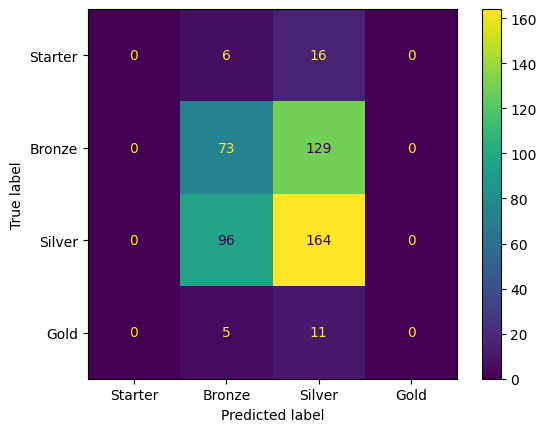

In [43]:
# Mostrar Matriz de Confusão
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmentos)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmentos)
disp.plot()

## 5.3 - Tuning de Hiperparâmetros
Discutiremos a importância de ajustar os hiperparâmetros de um modelo de machine learning para melhorar sua performance. Exploramos a biblioteca Optuna, que automatiza o processo de busca pelos melhores hiperparâmetros. Focamos em dois hiperparâmetros específicos: MinSamplesLeaf e MaxDepth. Discutimos como esses hiperparâmetros afetam o desempenho do modelo e como definir um espaço de busca adequado para eles. Demonstramos como usar o Optuna para executar experimentos e encontrar os melhores hiperparâmetros. Ao final, mostramos o melhor resultado obtido e os hiperparâmetros correspondentes. O objetivo dessa abordagem é maximizar a acurácia do modelo.

In [44]:
# Ajustar hiperparâmetros do Modelo usando o Optuna
# min_samples_leaf = Mínimo de instâncias requeridos para formar uma folha(nó_terminal)
# max_depth = Profundidade máxima da árvore

def decisiontree_optuna(trial):
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)

    # Setar parâmetros no modelo que está no pipeline
    # Objeto do pipeline: classifier
    # depois do __ vem o parâmetro que vou mecher
    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)

    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')
    return scores.mean()

In [45]:
# Executar a automação de experimentos
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optuna, n_trials=100)

[I 2024-04-20 08:57:00,346] A new study created in memory with name: no-name-f1b9e1fe-abc8-4d82-b962-3ad287b56425
[I 2024-04-20 08:57:00,369] Trial 0 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 12, 'max_depth': 5}. Best is trial 0 with value: 0.45398359906692637.
[I 2024-04-20 08:57:00,394] Trial 1 finished with value: 0.4600197195969507 and parameters: {'min_samples_leaf': 20, 'max_depth': 3}. Best is trial 1 with value: 0.4600197195969507.
[I 2024-04-20 08:57:00,415] Trial 2 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 10, 'max_depth': 6}. Best is trial 2 with value: 0.4739917754851743.
[I 2024-04-20 08:57:00,436] Trial 3 finished with value: 0.4699877353726283 and parameters: {'min_samples_leaf': 7, 'max_depth': 3}. Best is trial 2 with value: 0.4739917754851743.
[I 2024-04-20 08:57:00,459] Trial 4 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 6, 'max_depth': 7}. Best is trial 2 with val

In [46]:
# Qual foi o melhor resultado e melhor conjunto de hiperparametros
print(f'Melhor acurácia: {estudo_decisiontree.best_value}')
print(f'Melhores parâmetros: {estudo_decisiontree.best_params}')

Melhor acurácia: 0.4740518962075848
Melhores parâmetros: {'min_samples_leaf': 11, 'max_depth': 2}


## 5.4 - Visualizar Árvore de Decisão
Aprendemos como visualizar uma árvore de decisão gerada por um algoritmo. Para isso, fizemos algumas transformações nos dados para prepará-los para a visualização. Criamos uma cópia do conjunto de dados e realizamos uma codificação das variáveis categóricas para que pudéssemos representá-las na árvore. Em seguida, treinamos o modelo com os hiperparâmetros ideais e utilizamos o método Plot Tree para visualizar a árvore resultante. Interpretamos os valores presentes no gráfico, como as perguntas feitas pelo modelo e as classes atribuídas a cada ramo da árvore. Observamos que o modelo teve dificuldade em distinguir entre as classes Silver e Bronze. Concluímos ressaltando a importância da interpretabilidade dos modelos e encerramos o vídeo.

In [47]:
# Preparar o conjunto de Dados para Treinar e conseguir Visualizar a árvore
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label':'localizacao', 'atividade_economica_label':'atividade_economica'}, inplace=True)
X_train_tree.head(10)

,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [48]:
# Treinar o Modelo com o conjunto de hiperparâmetros ideal
clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'],
                                          max_depth=estudo_decisiontree.best_params['max_depth'])
y_train_tree = y.copy()
clf_decisiontree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=11)

[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 425959.422\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 0, 0, 11]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.421\nsamples = 152\nvalue = [110, 0, 35, 7]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90.0, 16.0, 225.0, 4.0]\nclass = Silver'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64.0, 16.0, 218.0, 0.0]\nclass = Silver')]

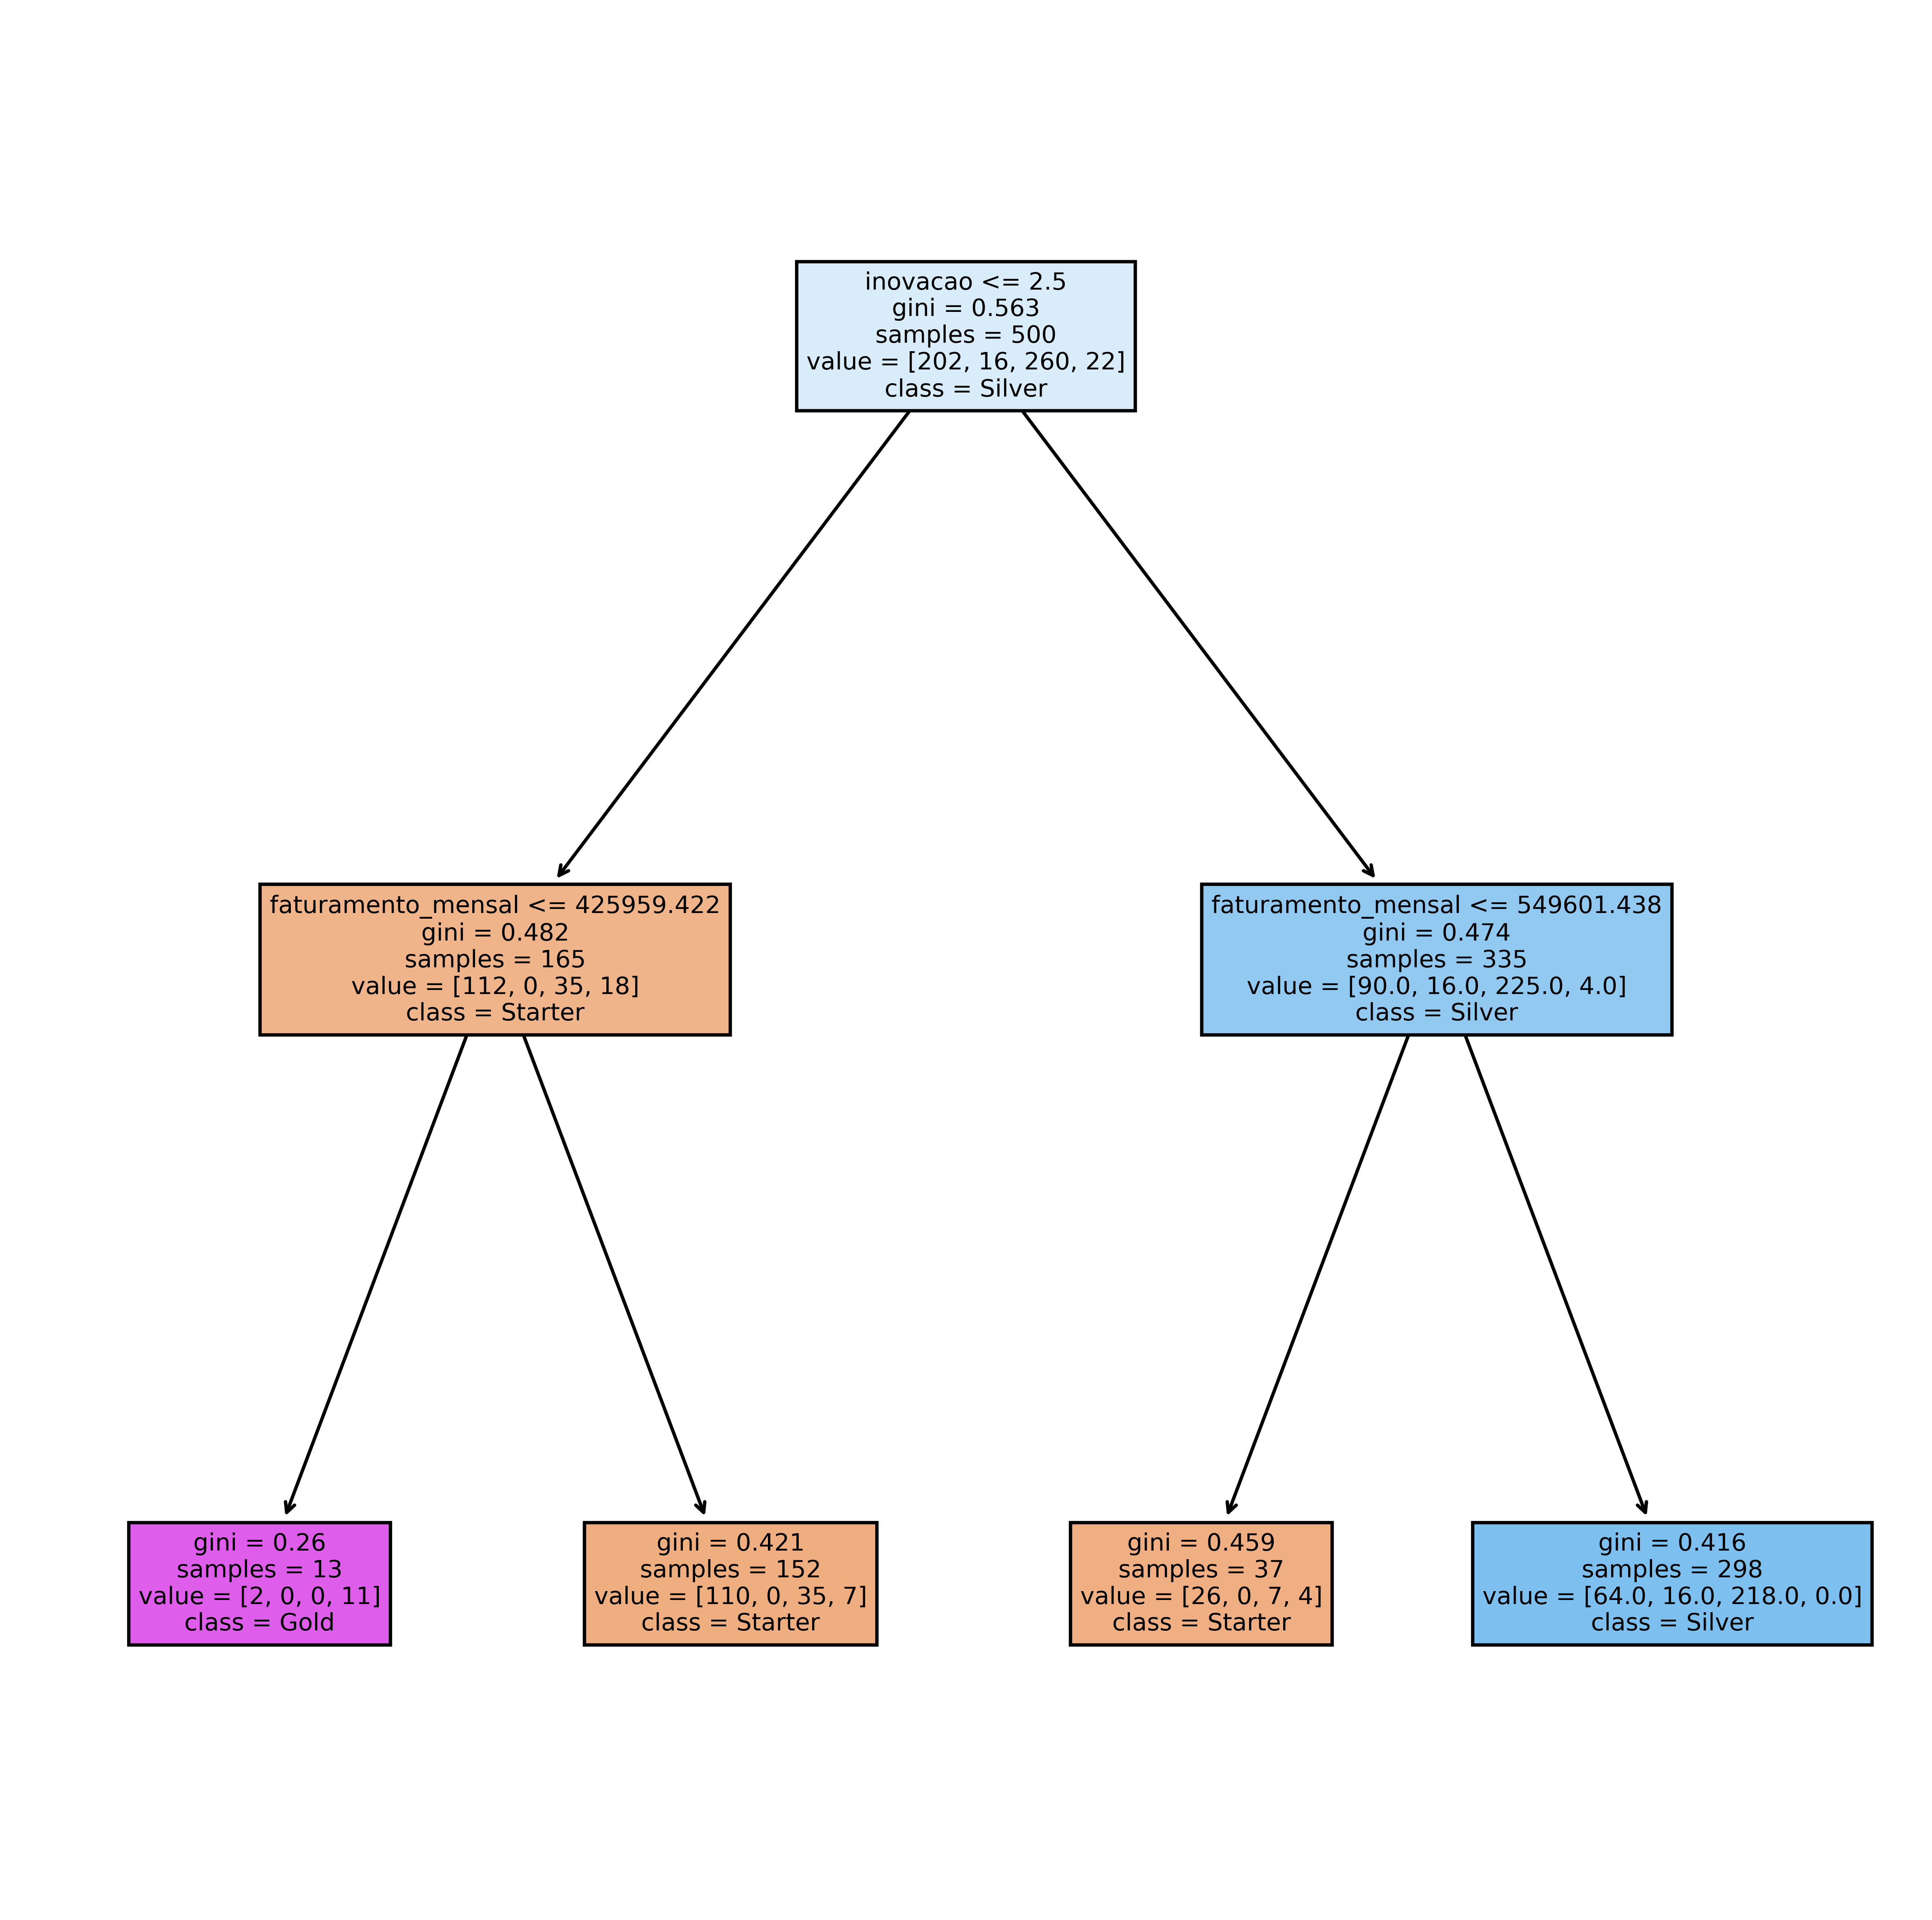

In [49]:
# Visualizar a árvore de decião com Plot Tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=600)

plot_tree(clf_decisiontree,
          feature_names=X_train_tree.columns.to_numpy(),
          class_names= lista_segmentos,
          filled=True)

# 6 - Construir Aplicação Batch


## 6.1 - Salvar Modelo
aprendemos como salvar um modelo de machine learning para uso posterior. Utilizamos a biblioteca JobLib para criar um pipeline com o modelo tunado, ou seja, com os melhores hiperparâmetros. O pipeline consiste em dois steps: o preprocessor, que realiza as transformações das colunas, e o classifier, que é o classificador em si. Após treinar o modelo, utilizamos a função joblib.dump() para salvar o modelo em um arquivo. Com isso, podemos utilizar esse modelo para fazer predições em batch.

In [50]:
dt_model_tunado = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', 
                                   DecisionTreeClassifier(
                                        min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'],
                                        max_depth=estudo_decisiontree.best_params['max_depth']))])

# Treinar modelo tunado
dt_model_tunado.fit(X, y)

# Salvar modelo
joblib.dump(dt_model_tunado, 'modelo_classificacao_decision_tree.pkl')

['modelo_classificacao_decision_tree.pkl']

## 6.2 - Entregar Aplicação Batch (App de predição batch "por arquivo")
criamos um DataFrame chamado "Empresas" e definimos a função "predict". Essa função recebe um arquivo como entrada e lê esse arquivo para um DataFrame. Em seguida, fazemos a predição usando o modelo carregado anteriormente e criamos um novo DataFrame chamado "Segmentos" com a classificação resultante. Depois, concatenamos os DataFrames de entrada e saída em um novo DataFrame chamado "Predições" e salvamos esse DataFrame como um arquivo CSV. Por fim, usamos o gradio para criar uma interface visual simples que permite ao usuário fazer o upload de um arquivo, executar a função de predição e fazer o download do arquivo resultante. Essa abordagem é útil para lidar com predições em lote, onde recebemos um arquivo com informações e retornamos um arquivo com as informações e a classificação feita pelo modelo.

In [54]:
modelo = joblib.load('./modelo_classificacao_decision_tree.pkl')

def predict(arquivo):
    df_empresas = pd.read_csv(arquivo.name)
    y_pred = modelo.predict(df_empresas)
    df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
    df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
    df_predicoes.to_csv('./predicoes.csv')
    return './predicoes.csv'

demo = gr.Interface(
    predict,
    gr.File(file_types=[".csv"]),
    "file"
)

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
